In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 壹、Linear Regression

In [2]:
from sklearn.datasets import load_diabetes    #用python內建資料庫裡的糖尿病數據

In [3]:
diabetes_dataset=load_diabetes()

In [4]:
print(diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [5]:
diabetes=pd.DataFrame(diabetes_dataset.data,
                    columns=diabetes_dataset.feature_names)
#把資料建立成dataframe

In [6]:
diabetes['Disease_Progression']=diabetes_dataset.target        #把「一年後疾病進展的定量測量」結果加入表格

In [7]:
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease_Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


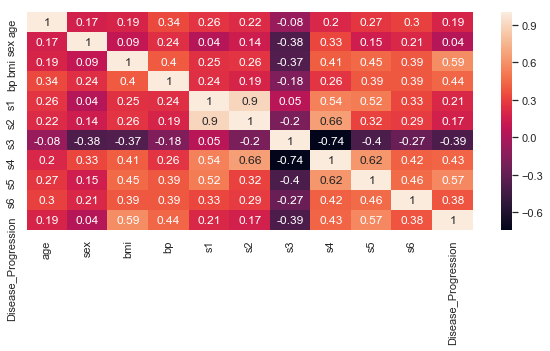

In [8]:
correlation_matrix=diabetes.corr().round(2)   #畫相關係數圖(取到小數第二位)
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(correlation_matrix,annot=True)

In [9]:
X1=diabetes.loc[:,'age':'s6'].values      #X1用所有的變數
X2=diabetes.loc[:,['bmi','s5']].values    #X2用相關係數最高的兩個
Y=diabetes.Disease_Progression

In [10]:
from sklearn import preprocessing
normalized_X1=preprocessing.normalize(X1)       #標準化X1
normalized_X2=preprocessing.normalize(X2)       #標準化X2

In [11]:
#針對X1和Y做迴歸
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(normalized_X1,Y,
                                              test_size=0.25,
                                              random_state=0)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y1_predict=model.predict(x_test)

In [12]:
#針對X2和Y做迴歸
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(normalized_X2,Y,
                                              test_size=0.25,
                                              random_state=0)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y2_predict=model.predict(x_test)

Text(0, 0.5, 'Predict Y')

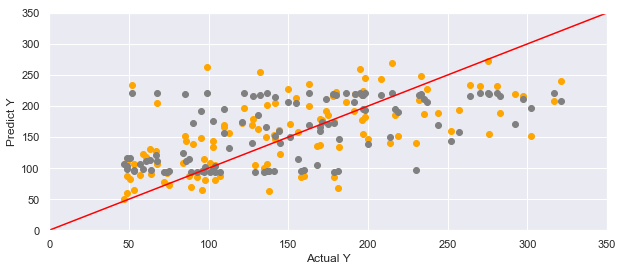

In [13]:
plt.scatter(y_test,y1_predict,c='orange')    #橘色的點是用全部變數下去跑的迴歸結果
plt.scatter(y_test,y2_predict,c='grey')      #輝色的點是取相關係數最大的兩個變數下去跑的迴歸結果
plt.xlim(0,350)
plt.ylim(0,350)
plt.plot([0,350],[0,350,],'red')
plt.xlabel('Actual Y')
plt.ylabel('Predict Y')

#### 由最後一張圖可以看出來，只採用相關係數最高的兩個所預測的結果，比所有變數都丟進去好，不論高估或低估的程度都比較小。
#### 但整體而言，高低估程度還是很顯著，用線性迴歸的預測並不準確。

# 貳、分類

In [14]:
from sklearn.datasets import load_breast_cancer    #用python內建資料庫裡的乳腺癌數據

In [15]:
bcancer_dataset=load_breast_cancer()

In [16]:
print(bcancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [17]:
bcancer=pd.DataFrame(bcancer_dataset.data,
                    columns=bcancer_dataset.feature_names)
#把資料建立成dataframe

In [18]:
bcancer['WDBC']=bcancer_dataset.target    #把WDBC的兩個分類[惡性/良性]放進表格裡

In [19]:
bcancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,WDBC
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


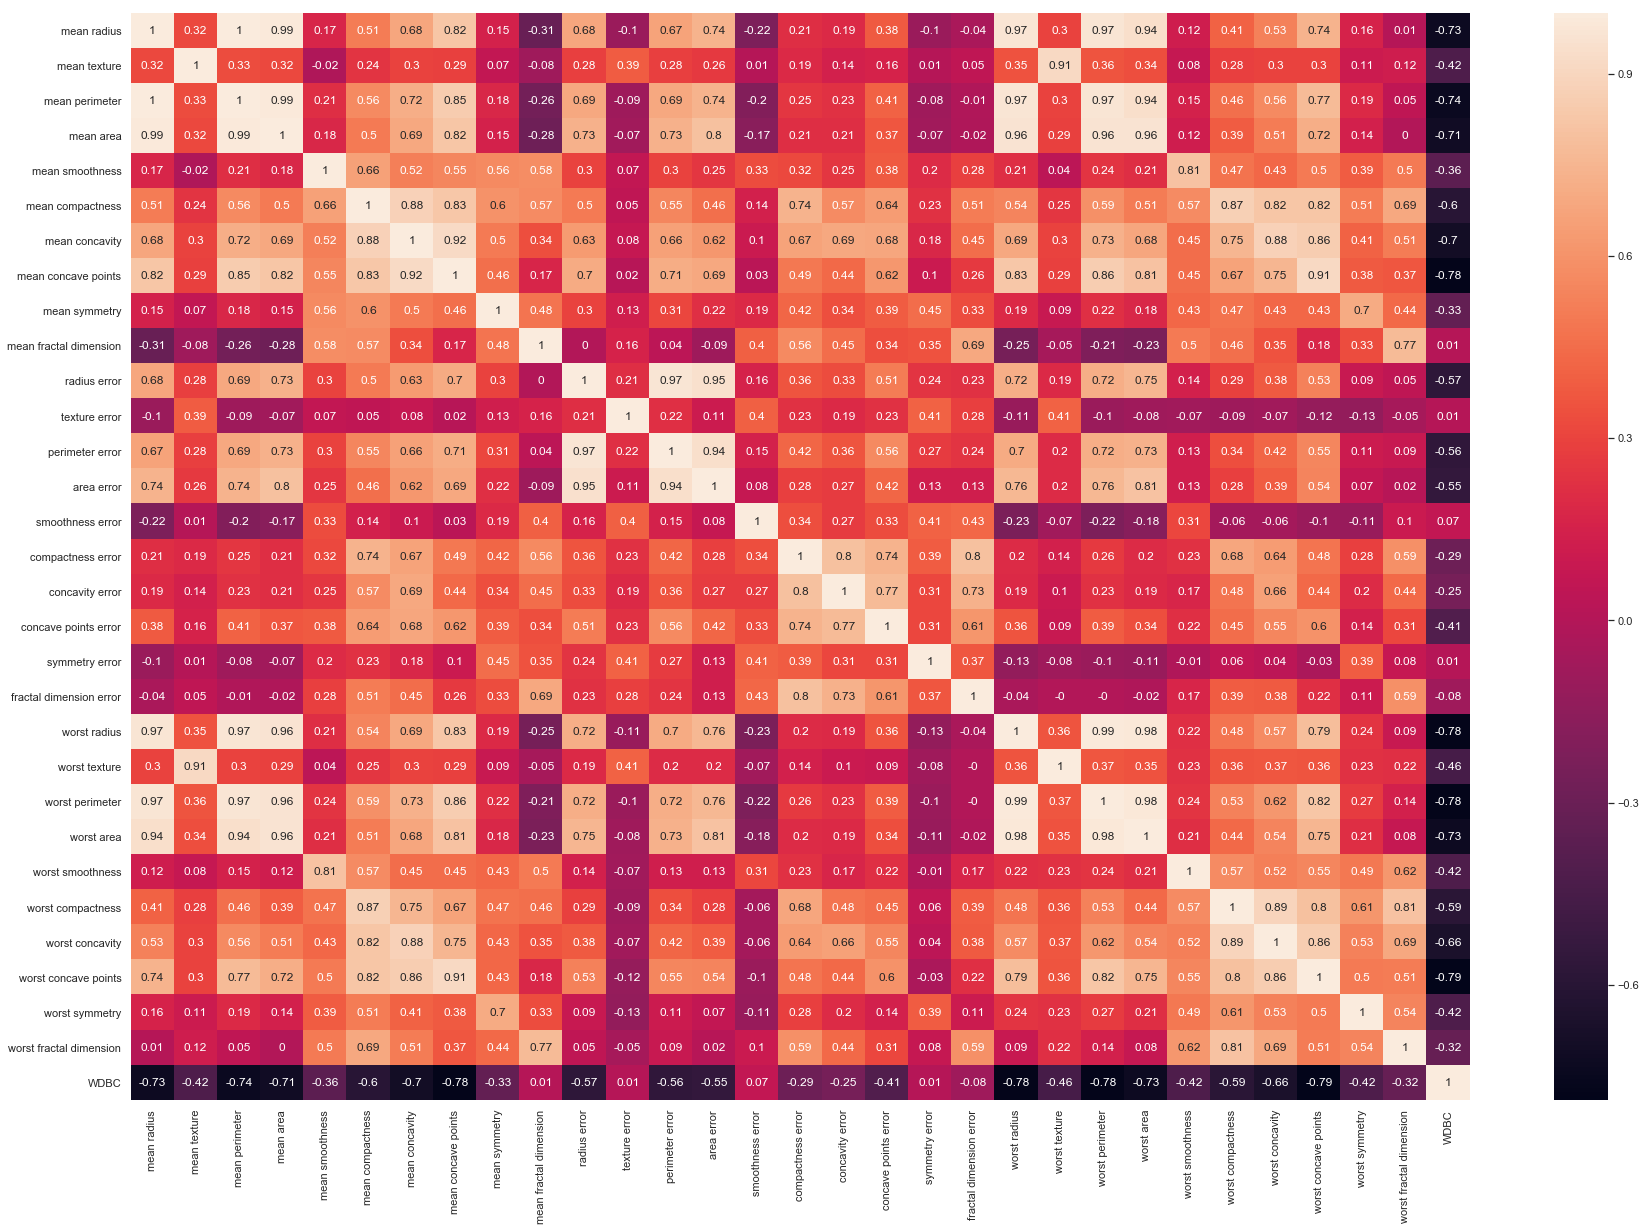

In [20]:
correlation_matrix=bcancer.corr().round(2)   #畫相關係數圖(取到小數第二位)
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(correlation_matrix,annot=True)

In [21]:
x=bcancer_dataset.data
y=bcancer_dataset.target

### 一、X1：取四個相關係數最大的變數做分類

In [22]:
X1=x[:,[7,20,22,27]]         #取相關係數大於正負0.75的四個變數
Y=y

In [23]:
#把X1壓縮成二維
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X1)
X1=pca.transform(X1)

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X1,Y,
                                              test_size=0.25,
                                              random_state=0)

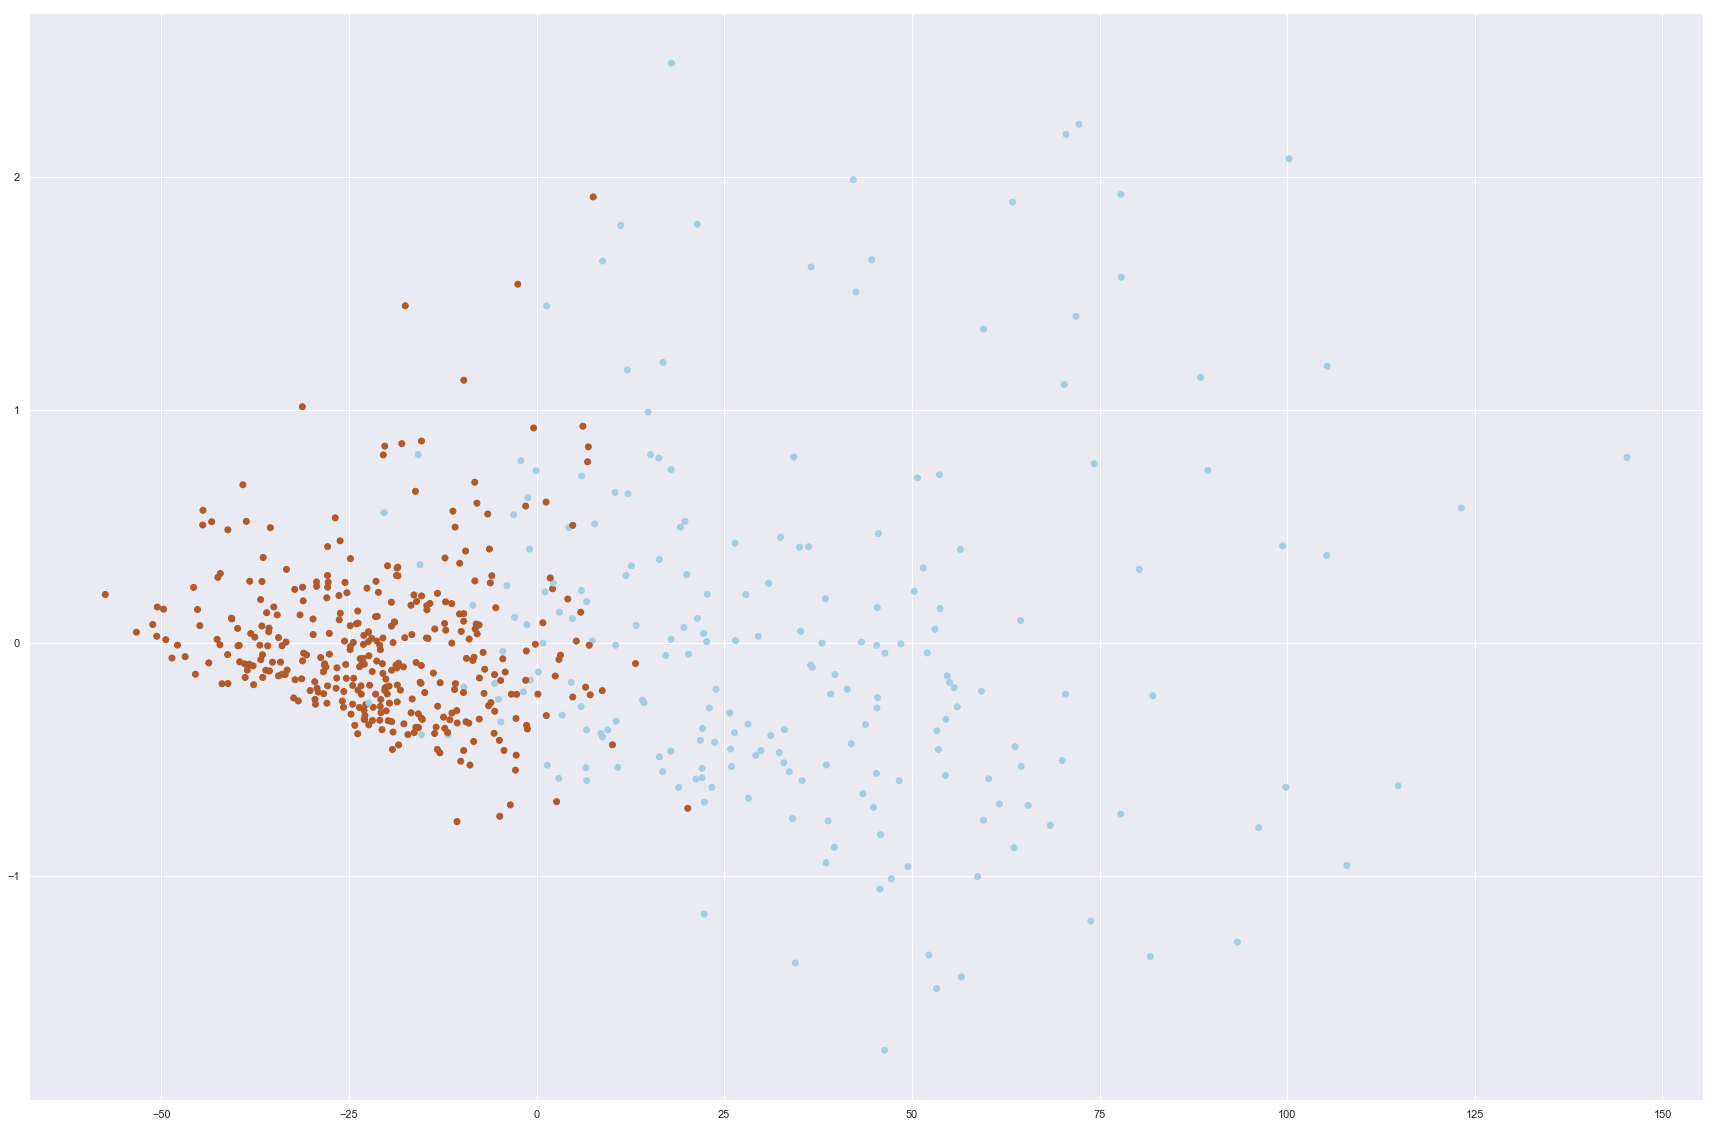

In [25]:
plt.scatter(X1[:,0],X1[:,1],c=Y,cmap='Paired')

In [26]:
#把X1丟進去訓練
from sklearn.svm import SVC
clf=SVC(gamma='auto')

clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)

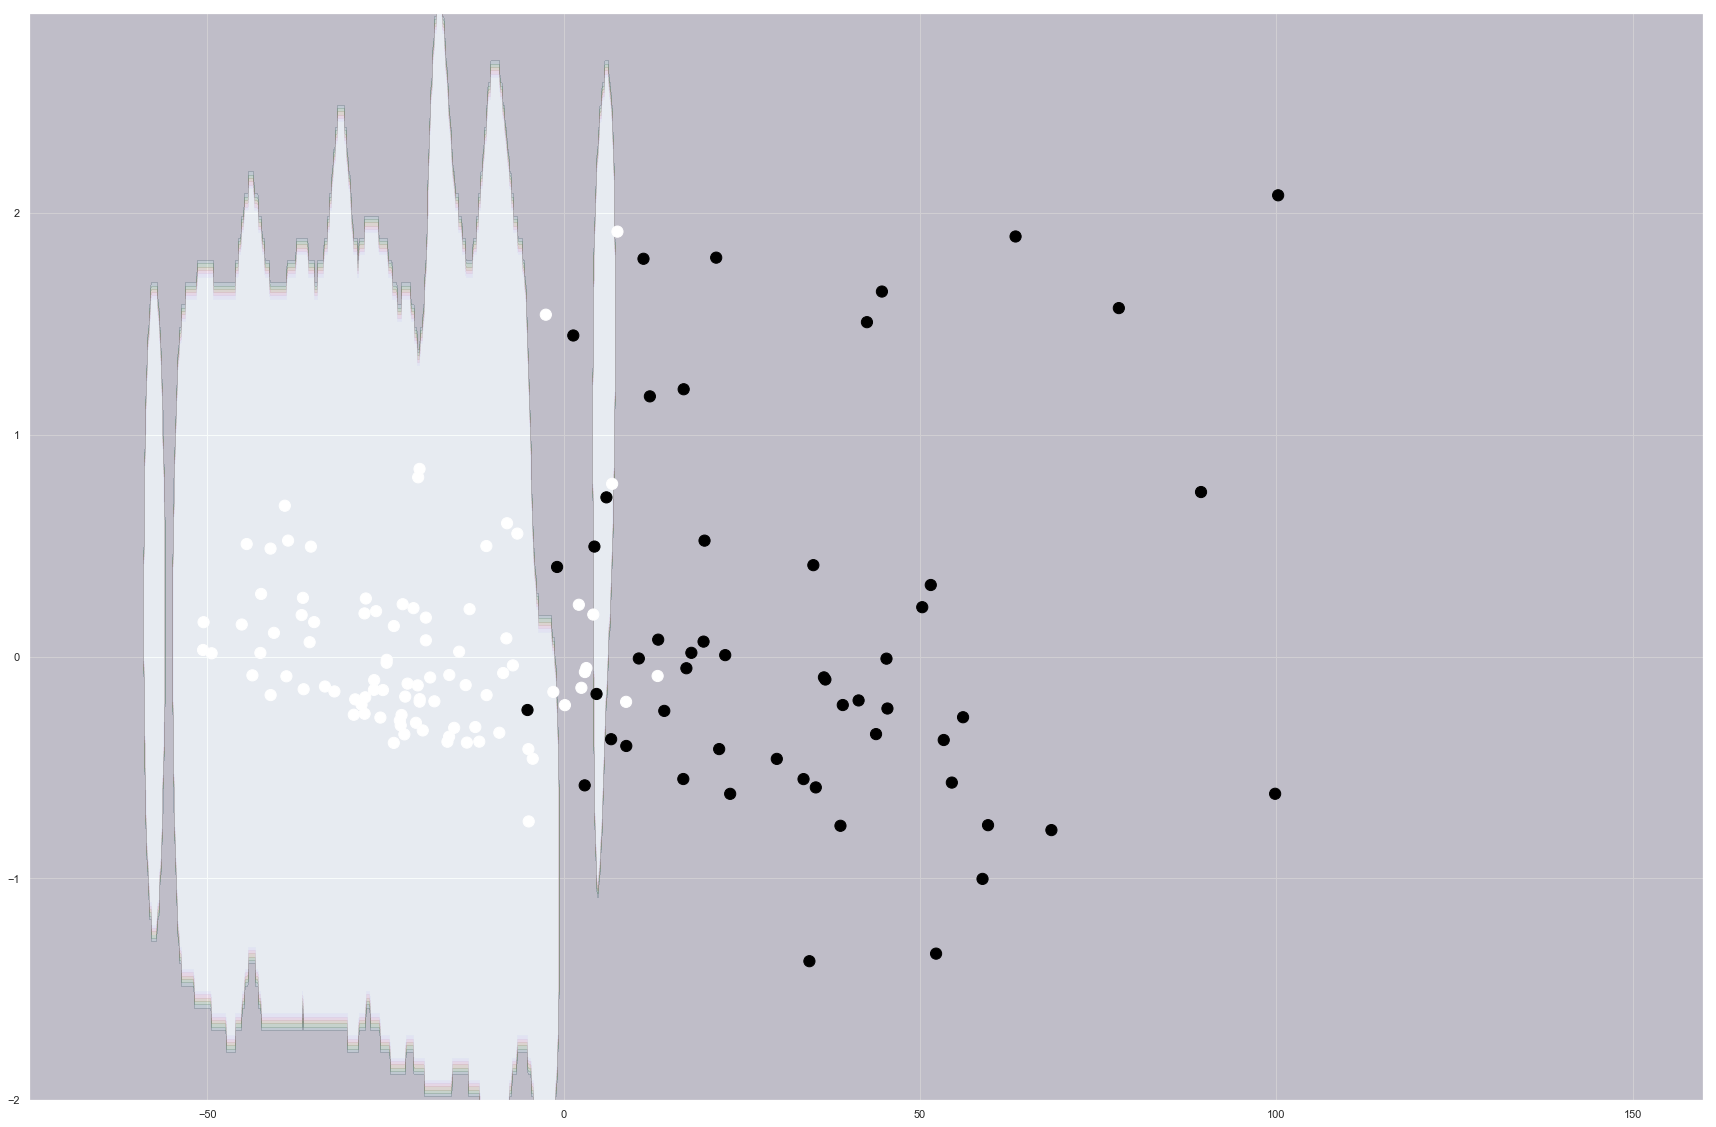

In [27]:
#畫等高線圖和點分布圖
x0=np.arange(-75,160,0.1)
y0=np.arange(-2,3,0.1)

x1,x2=np.meshgrid(x0,y0)
A=np.c_[x1.ravel(),x2.ravel()]
b=clf.predict(A)
B=b.reshape(x1.shape)

plt.contourf(x1,x2,B,cmap='cubehelix',alpha=0.2)

plt.scatter(x_test[:,0],x_test[:,1],cmap='cubehelix',c=y_test,s=125)

### 二、X2：從前一步再取其中最大相關係數的變數，和跟他相關性最小的另一個變數

#### 分錯的點有14個，中間重疊的部分分得比較不好。

In [33]:
X2=x[:,[20,27]]
#從X1四個最大相關係數(分別是-0.78,-0.78,-0.78,-0.79)的變數中取相關係數最大(-0.79)的那個，再從其餘三個中挑選和剛選定的變數之相關係數(0.38,0.24,0.27)最小的變數(0.24)，讓兩個變數間重複的資訊少一點，說不定能對分類有幫助。

In [34]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X2,Y,
                                              test_size=0.25,
                                              random_state=0)

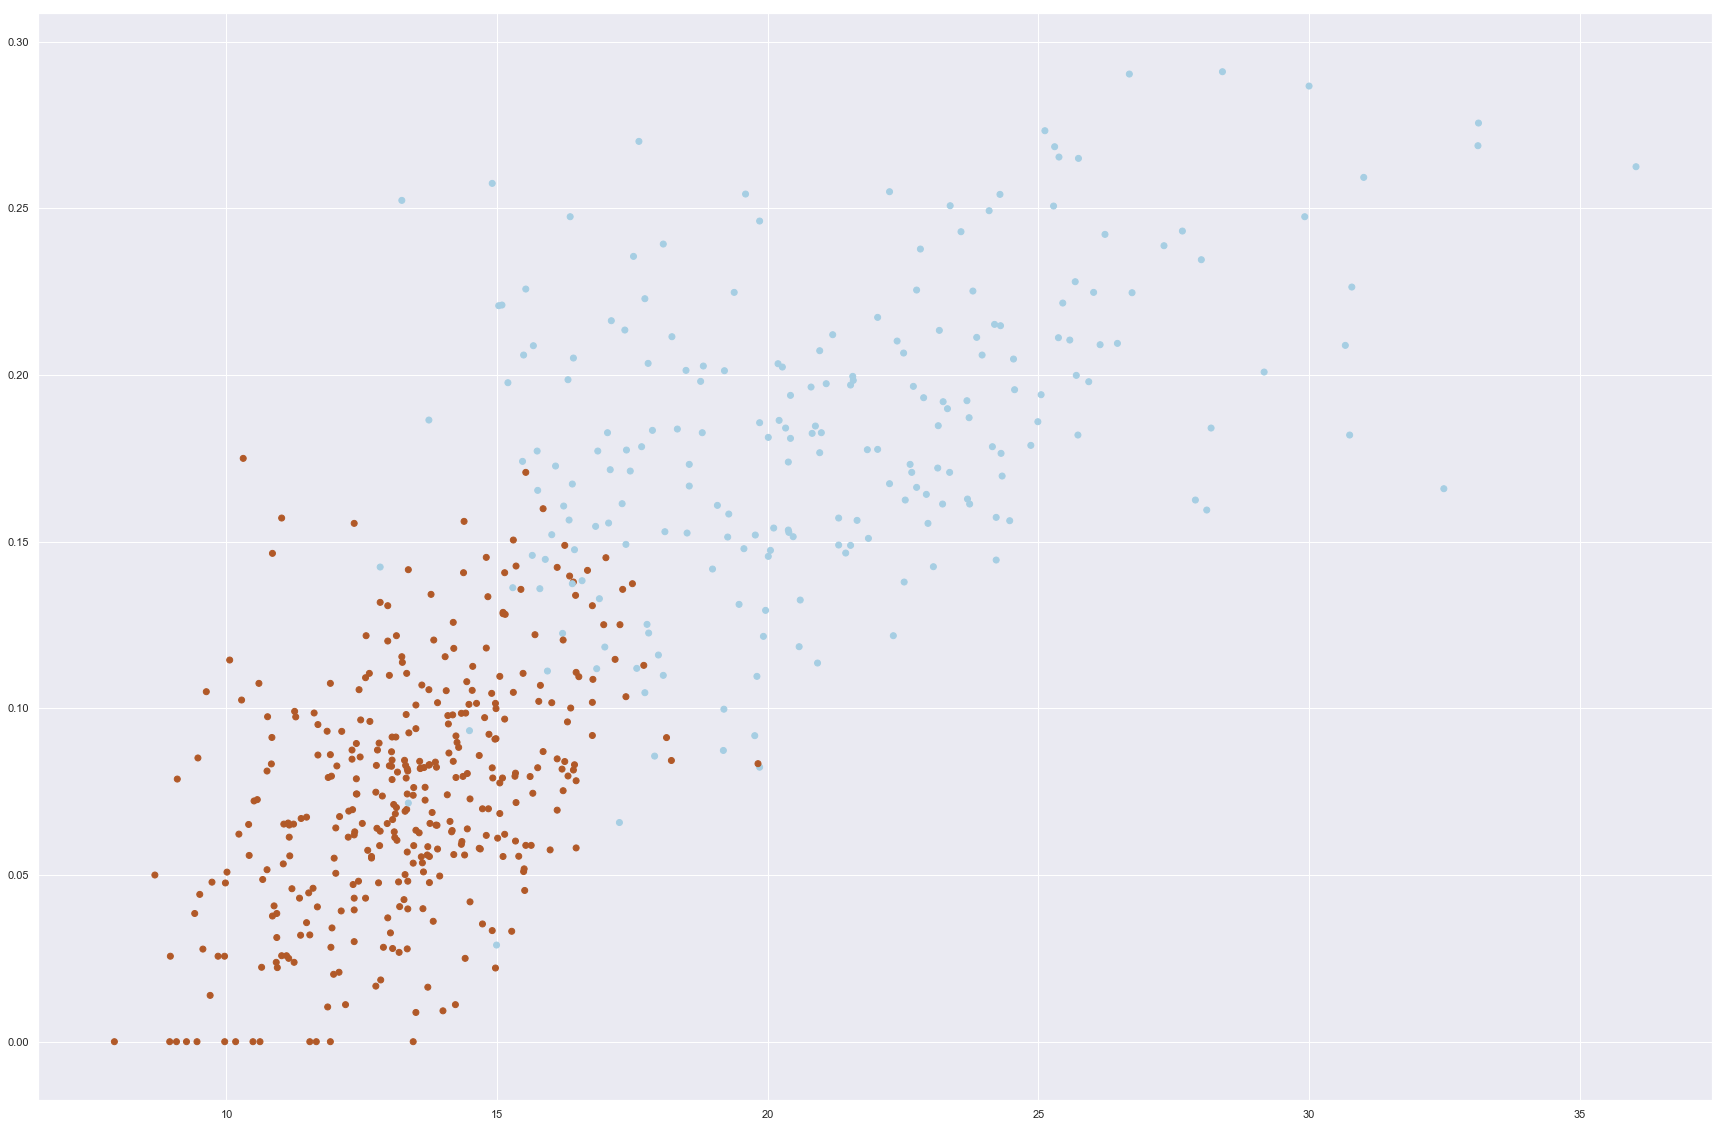

In [35]:
plt.scatter(X2[:,0],X2[:,1],c=Y,cmap='Paired')

In [36]:
#把X2丟進去訓練
from sklearn.svm import SVC
clf=SVC(gamma='auto')

clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)

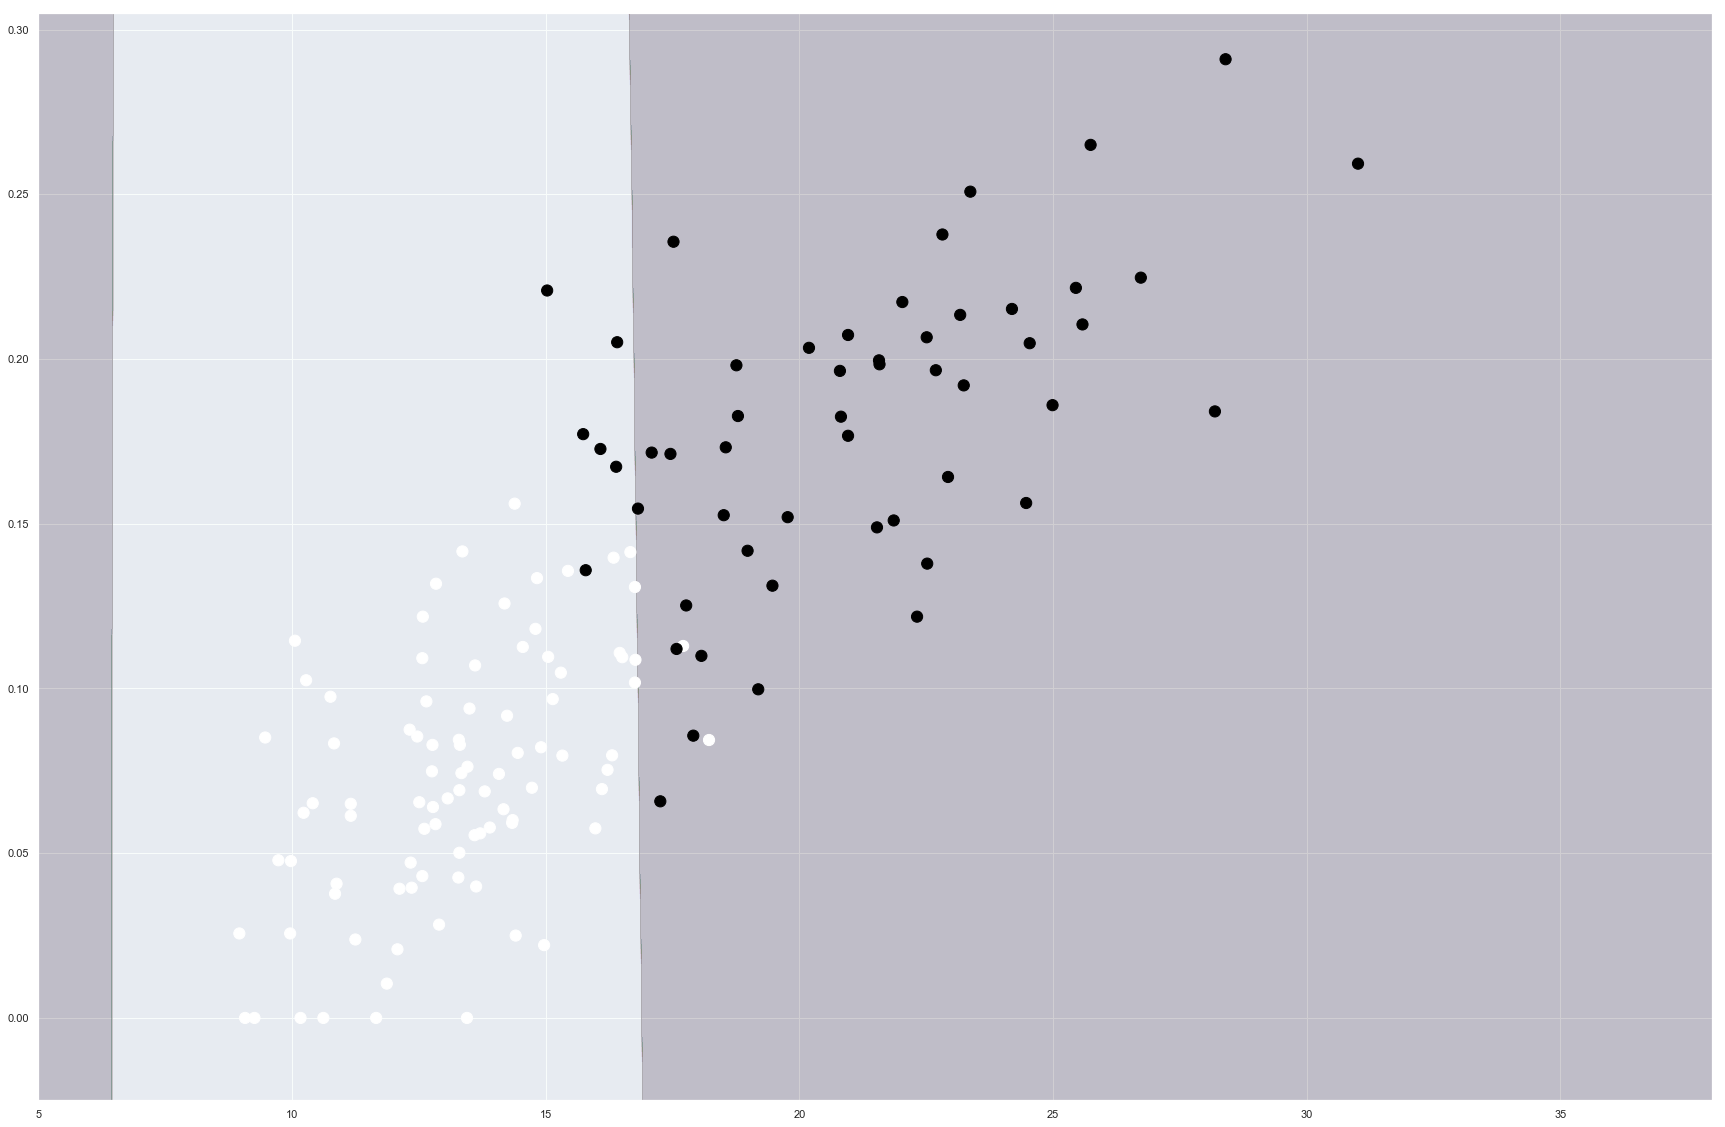

In [38]:
#畫等高線圖和點分布圖
x0=np.arange(5,38,0.01)
y0=np.arange(-0.025,0.31,0.01)

x1,x2=np.meshgrid(x0,y0)
A=np.c_[x1.ravel(),x2.ravel()]
b=clf.predict(A)
B=b.reshape(x1.shape)

plt.contourf(x1,x2,B,cmap='cubehelix',alpha=0.2)

plt.scatter(x_test[:,0],x_test[:,1],cmap='cubehelix',c=y_test,s=125)

#### 分錯的點有9個，分類效果有比取四個變數好了。

### 三、X3：取所有變數自動分類

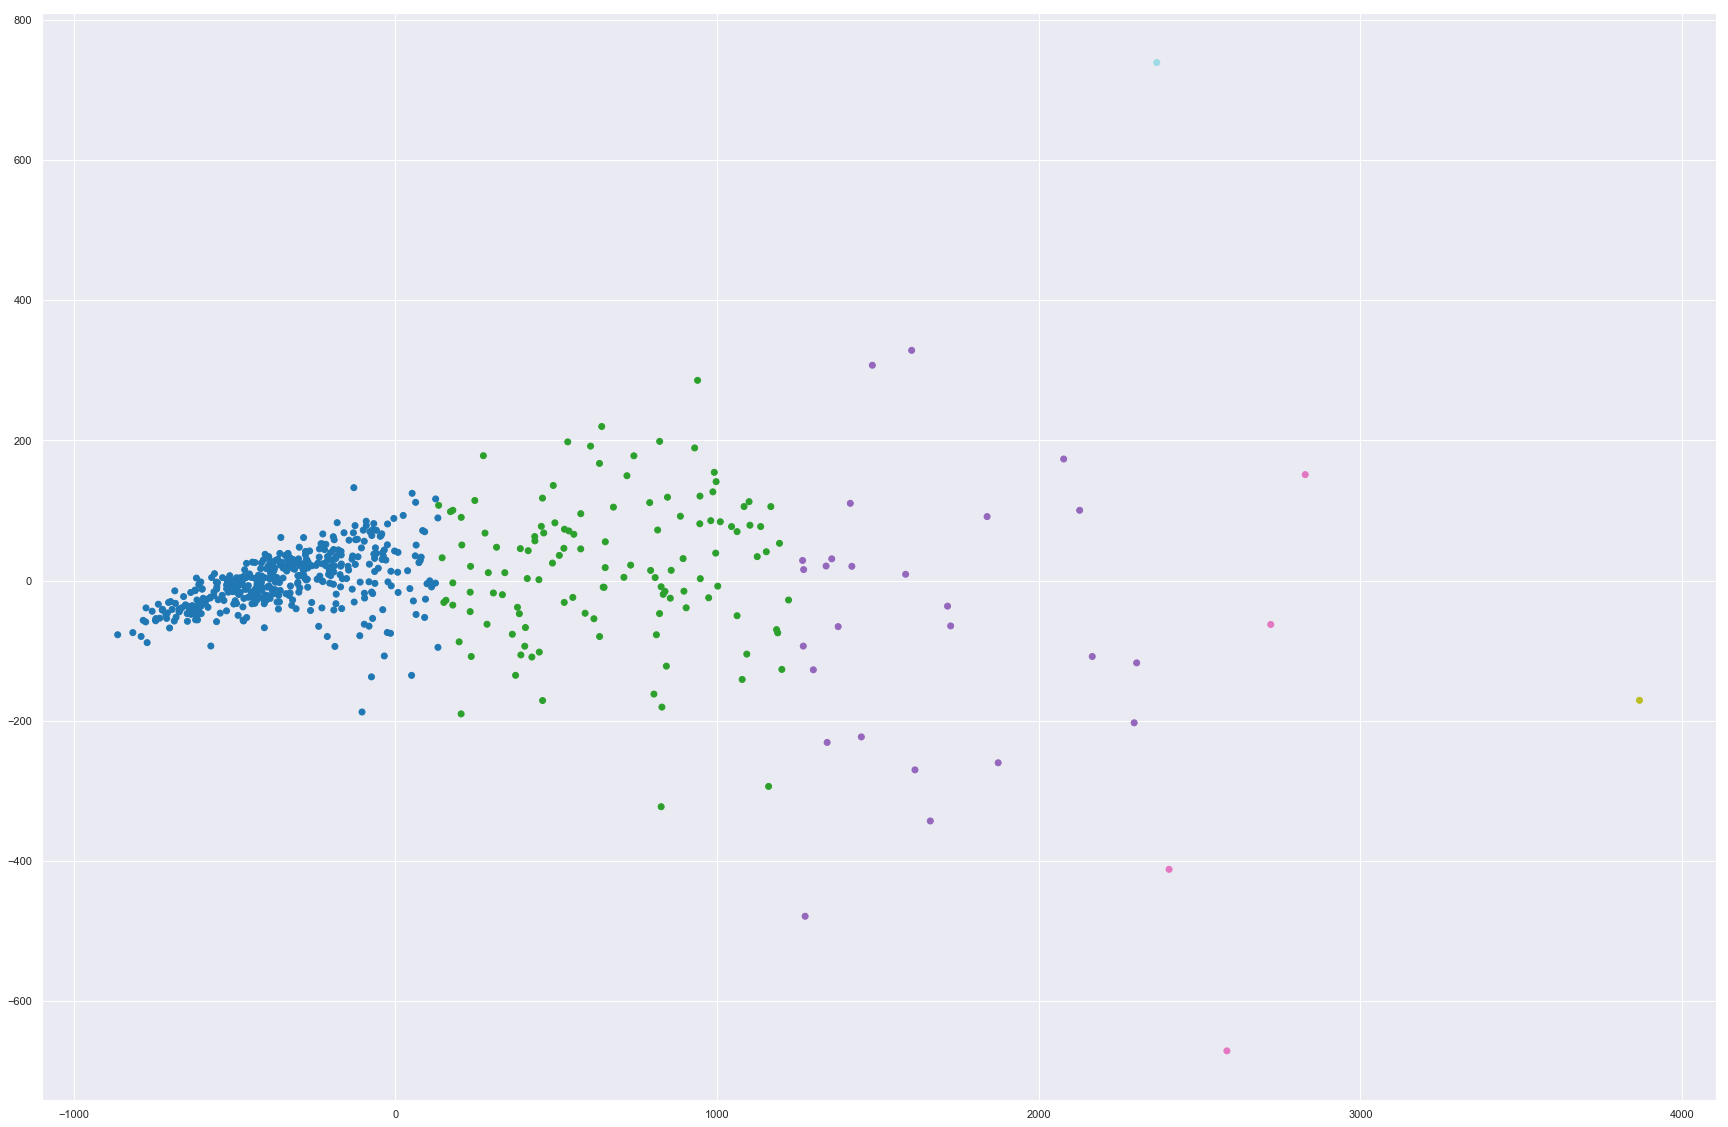

In [60]:
#X3:把x(所有變數)壓縮成二維
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(x)
X3=pca.transform(x)

#嘗試用MeanShift讓他完全自動分類
from sklearn.cluster import MeanShift
clf=MeanShift()
clf.fit(X3)
plt.scatter(X3[:,0],X3[:,1],c=clf.predict(X3),cmap='tab20')

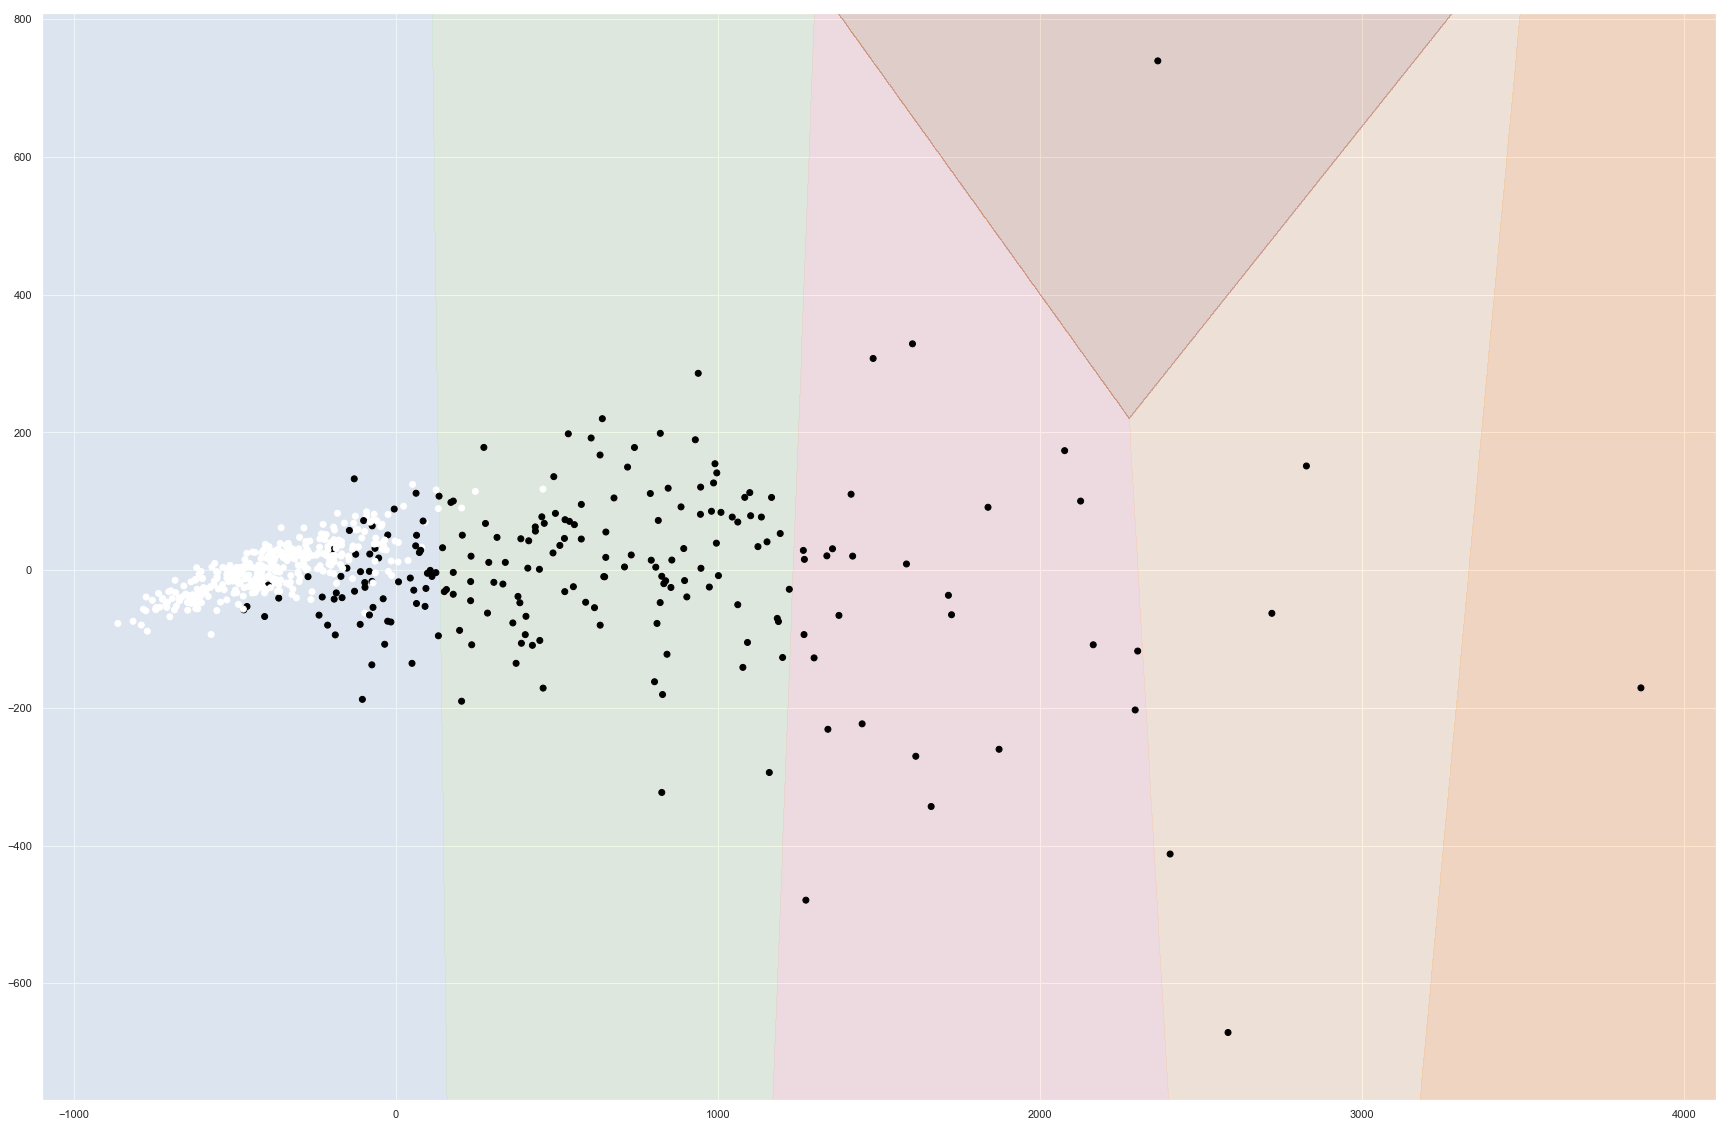

In [64]:
#畫自動分類出的等高線和點分布圖
x0=np.arange(-1100,4100,1)
y0=np.arange(-770,810,1)

xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)
Z=z.reshape(xm.shape)

plt.contourf(xm,ym,Z,alpha=0.2,cmap='Paired')

#將原本資料內設分類(target)的點畫上去比較
plt.scatter(X3[:,0],X3[:,1],c=Y,cmap='cubehelix')

#### 自動分類分成了六類，其中有右邊五類主要都是原分類中黑色那類，而左邊藍色那類較多是原分類中白色那類。
#### 雖然自動分類分出來的結果比原本的分類數目多了好幾個，但從上圖仔細觀察可以發現，他還是能大略切出原本分類，只是把黑色點的分類又再分成了許多類，也可以推測白色類別之間差異可能較不大，而黑色類別則可能因著不同變數而有比較明顯的不同， 所以才會在分類時又被分成好幾類。